In [1]:
import os
print(os.getcwd())

with open("twec/examples/training/compass.txt") as textfile:
    doc = textfile.readlines()
    
cancertypes = ['longkanker', 'prostaatkanker', 'darmkanker', 'leukemie', \
              'lymfeklierkanker', 'slokdarmkanker', 'alvleesklierkanker', 'blaaskanker', \
              'eierstokkanker', 'baarmoederhalskanker', 'bloedkanker',\
              'nierkanker', 'maagkanker'] #borstkanker excluded

cancerfreq = {}

for line in doc:
    for cancer in cancertypes:
        if cancer in line:
            if cancer in cancerfreq.keys():
                cancerfreq[cancer] += 1
            else:
                cancerfreq[cancer] = 1

print(cancerfreq)

/home/avanluenen
{'leukemie': 1885, 'baarmoederhalskanker': 1184, 'alvleesklierkanker': 721, 'longkanker': 2958, 'darmkanker': 2716, 'prostaatkanker': 1792, 'nierkanker': 159, 'blaaskanker': 247, 'maagkanker': 310, 'slokdarmkanker': 439, 'eierstokkanker': 408, 'lymfeklierkanker': 372, 'bloedkanker': 142}


/home/avanluenen/.local/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


13
13
longkanker 0.83999026 2958
prostaatkanker 0.8240938 1792
darmkanker 0.8181133 2716
leukemie 0.8203263 1885
lymfeklierkanker 0.79671174 372
slokdarmkanker 0.7810106 439
alvleesklierkanker 0.78103364 721
blaaskanker 0.7606285 247
eierstokkanker 0.7564624 408
baarmoederhalskanker 0.75607 1184
bloedkanker 0.74783045 142
nierkanker 0.7442279 159
maagkanker 0.74677384 310


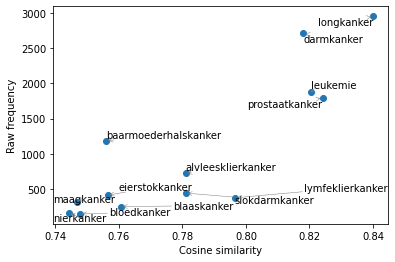

In [2]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

w2v = Word2Vec.load("twec/model/compass.model")

my_words = ['longkanker', 'prostaatkanker', 'darmkanker', 'leukemie', \
              'lymfeklierkanker', 'slokdarmkanker', 'alvleesklierkanker', 'blaaskanker', \
              'eierstokkanker', 'baarmoederhalskanker', 'bloedkanker',\
              'nierkanker', 'maagkanker']#, 'kanker', 'borstkanker']

print(len(my_words))
print(len(cancertypes))

my_vocab = {}
for w in my_words:
    my_vocab[w] = w2v.wv.similarity('kanker', w)
    

X = []
Y = []


for x in my_vocab.keys():
    X.append(my_vocab[x])
    Y.append(cancerfreq[x])


plt.scatter(X, Y)
texts = []
for i, txt in enumerate(my_words):
    print(txt, X[i], Y[i])
    #plt.annotate(txt, (X[i], Y[i]))
    texts.append(plt.text(X[i], Y[i], txt))

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))
plt.xlabel('Cosine similarity')
plt.ylabel('Raw frequency')

plt.savefig("NNcorrellationfreqcossim")